# ECE 5470 Lab 2 Report

## by Rufei Ye


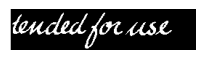

im1.vx
<scaled size: (56 x 256) >


In [14]:
import numpy as np
from v4 import vx
from v4 import vd

vd.dispmvx("im1.vx", size=0.3, capt="im1.vx")


### Section 2


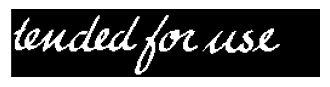

im1.vx:input image
<scaled size: (56 x 256) >


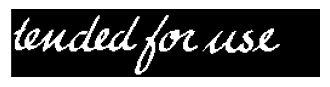

im1.mx:output image after computing a local max filter, with thicker front
<scaled size: (56 x 256) >


In [12]:
vd.dispmvx("im1.vx", size=0.5, capt="im1.vx:input image")
vd.dispmvx("im1.vx", size=0.5, capt="im1.mx:output image after computing a local max filter, with thicker front")

### Section 3
#### 3.1 Test image presentation

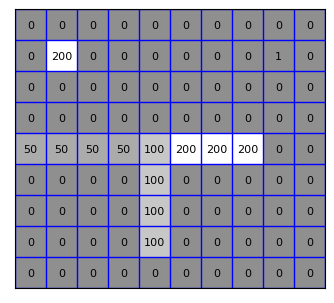

my small test image
<scaled size: (9 x 10) >


In [15]:
vd.dispsvx ('image.vx', capt='my small test image')

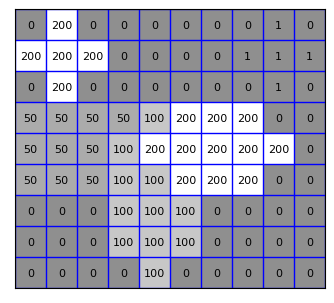

outcome image after vtemp
<scaled size: (9 x 10) >


In [16]:
vd.dispsvx ('image.mx', capt='outcome image after vtemp')

vtemp computes a local max filter, so I designed a test image in two parts to demonstrate its operation as followings:
1. In the top left and top right corners of the test image, each has a separate pixel: 200 and 1. After computing vtemp, these two non-zero pixels expand up, down, left and right, independent of the pixel value.
2. In the middle of the test image, there is a connected section of pixel area with different pixel values. After computing the max filter, the non-zero pixels  expand up, down, left and right. Moreover, as the program designed, when extended in the same position, the larger pixel value overwrites the smaller one.

As a result, the local max filter works well in vtemp.

### Section 4 (Bound)
#### 4. Program description
The whole program implements the following functions: input a binary image, identify its foreground and background, and distinguish the boundary and interior pixels in the foreground, and finally output a new image.

The program was designed with reference to "vtemp" file, and it could be divided into the following parts:
  1. Title and package imports
  
     In the python comments, there's a program description.
     For packages, this program only requires the v4.vx module and numpy.
  2. Command line argument parsing and command documentation
     
     Use v4 vaparse to provide a convenient mechanism for argument specification in the standalone program.
  3.  Checks on the correct comand argument specification and reading files
      
      Check the input image and output filename in order to debug and run the command successfully.
  4. Comoute bound
      This section is the core part of the entire program.
      
      First, embed the image im into the image tm with a one pixel border. The extension operation is designed to help process the pixel points at the edges of the original image. The pixels of tmimage are used for judgment, while the pixels of imimage are used for modification and output. Two arrays have different index.
      
      Second, process the pixels on the image one after another with two for loops. In the loops, the first if statement is used to determine if the current pixel is in the foreground, and the second one is used to determine if there are any non-zero pixels around it. In the program, I chose 8-connected foreground and 4-connected background connectivity due to the shorter coding. I also tried another connectivity method and the output image will have a thicker boundary.
      
      In the tmimage, if one pixel value is higher than 0, it will be judged as foreground and enter in next if statement. If any of its top, bottom, left or right pixels is equal to 0, then it is at the boundary of the image object, so the pixel is assigned a value of 255, otherwise it is in the interior and assigned a value of 128.
 
      At the end of the code, the image im is written to the output file name delivered by the user.
      
#### 4.2. Program source code

In [ ]:
#!/usr/bin/env python

"""
The whole program implements the following functions: 
input a binary image, 
identify its foreground and background, 
and distinguish the boundary and interior pixels in the foreground, 
and finally output a new image.
"""

import numpy as np
from v4 import vx

# parse command parameters
of=' '
vxif=' '
vargs = vx.vaparse( "if= of= -v  - ")
if '-' in vargs:
   print ("boundpy program")
   print ("if= input file")
   print ("of= output file")
   print ("[-v] verbose mode")
   exit(0)

# check arguments 
optv = '-v' in vargs
if 'if' in vargs:
   inimage = vx.Vx(vargs['if'])
else:
   print ( 'boundpy  error: if= must be specified')
   exit()
im = inimage.i  #im:input

if im.dtype != 'uint8' :
    print ('boundpy error: image not byte type', file=sys.stderr)
    exit(1)

# check for output file name
if 'of' not in vargs:
   print ( 'boundpy error: of= must be specified')
   exit()

# Compute bound 
tmimage = vx.Vx( inimage ) 
tmimage.embedim((1,1,1,1)) #expand the original image
tm = tmimage.i


for y in range(im.shape[0] ):
    for x in range(im.shape[1]  ): 
        if tm[y+1,x+1] > 0:# if not background
           if (tm[y+1,x+2] == 0 or tm[y+2,x+1] == 0 or tm[y,x+1] == 0 or tm[y+1,x] == 0): 
           #now using 8-connected foreground
           #  if using 4-connected foreground :
           #  if (tm[y+1,x+2] == 0 or tm[y+2,x+1] == 0 or tm[y,x+1] == 0 or tm[y+1,x] == 0 or tm[y,x+2] == 0 or tm[y+2,x+2] == 0 or tm[y,x] == 0 or tm[y+2,x+0] == 0): 
           
             im[y,x] = 255 # set boundary
           else:
             im[y,x] = 128 # set interior


if optv:
   print (im)

inimage.write(vargs['of'])


#### 4.3. Example of working program

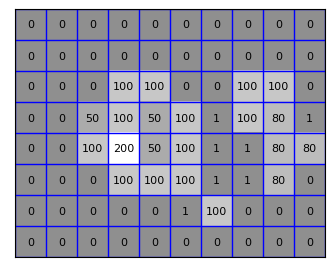

small test image input
<scaled size: (8 x 10) >


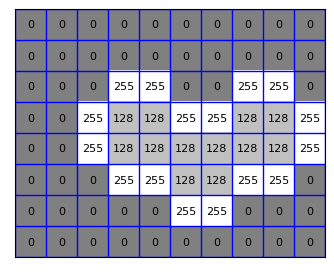

small test image output
<scaled size: (8 x 10) >


In [18]:
vd.dispsvx ('boundpy.vx', capt='small test image input')
vd.dispsvx ('boundpy4.mx', capt='small test image output')

#### 4.4 Examples on full size images

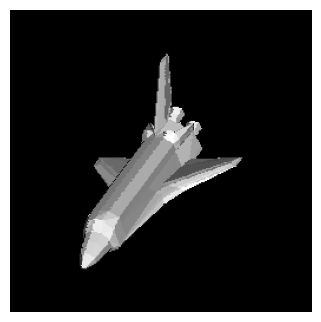

input shuttle
<scaled size: (256 x 256) >


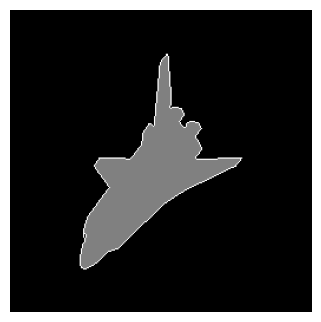

output shuttle with 8 connected foreground
<scaled size: (256 x 256) >


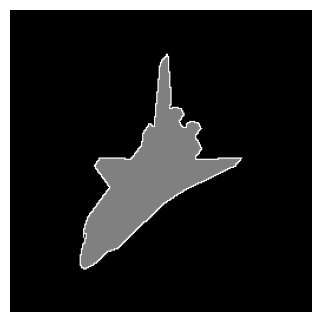

output shuttle with 4 connected foreground
<scaled size: (256 x 256) >


In [20]:
vd.dispmvx ('shuttle.vx', capt='input shuttle')
vd.dispmvx ('shuttle4.mx', capt='output shuttle with 8 connected foreground')
vd.dispmvx ('shuttle8.mx', capt='output shuttle with 4 connected foreground')

The program starts with the pixel in the top left corner, traverses to the right, then down, until the entire image is scanned and modified. 
Outermost outline of the shuttle is retained, and the internal three-dimensional shape are turned into gray.

In this section, I showed two outputs. The first one based on 8-connected foreground and 4-connected background connectivity, but in my view the boundary is not smooth enough, so I tried another connectivity. As the second output image shows, the boundary is thicker and smoother. 

### 5. (clabel)

#### 5.1 Porgram description

The main structure of the program is the same as section4. However, in section 5, a recursive subprogram called setlabel was used to search connected components and assign labels. 

The main algorithm is divided into three steps as follows.
  1. Iterate through all pixels and set all pixels (labels) to 0.
  
  2. Set the label of the current pixel to 150 (use a large number for better presentation).
  
  3. Traverse each pixel from top to bottom and left to right, starting from the top left corner of the image, to find the connected non-zero pixel region and label it. This step uses the recursive subprogram. After one seperate area is labeled, the pixel label value is increased by 50.（use a large increment to distinguish the color of the output image）.


In [ ]:
#!/usr/bin/env python
""" cclabel :generates a labeled output image in which all pixels of a given connected component are assigned a unique number

"""

import numpy as np
from v4 import vx

of=' '
vxif=' '
vargs = vx.vaparse( "if= of= -v  - ")
if '-' in vargs:
   print ("cc label")
   print ("if= input file")
   print ("of= output file")
   print ("[-v] verbose mode")
   exit(0)

def setlabel (x, y, L):
    global im, tm
    im[y, x] = L

    if tm[y+1,x+2]>0 and im[y, x+1]==0 :
        setlabel(x+1, y, L)
    if tm[y+1,x]> 0 and im[y, x-1]==0:
        setlabel(x-1, y, L)
    if tm[y+2,x+1]> 0 and im[y+1, x]==0:
        setlabel(x, y+1, L)
    if tm[y,x+1]> 0 and im[y-1, x]==0:
        setlabel(x, y-1, L)
  

# check arguments 
optv = '-v' in vargs
if 'if' in vargs:
   inimage = vx.Vx(vargs['if'])
else:
   print ( 'cclabel error: if= must be specified')
   exit()
im = inimage.i
if im.dtype != 'uint8' :
    print ('cclabel error: image not byte type', file=sys.stderr)
    exit(1)

# check for output file name
if 'of' not in vargs:
   print ( 'cclabel error: of= must be specified')
   exit()

# Compute setlabel
tmimage = vx.Vx( inimage ) 
tmimage.embedim((1,1,1,1))
tm = tmimage.i

for y in range(im.shape[0] ):
    for x in range(im.shape[1]  ):
         im[y,x] = 0 
         #set all pixels to 0

L = 150                
for y in range(im.shape[0]  ):
    for x in range(im.shape[1]  ):
        if tm[y+1,x+1]>0 and im[y,x]==0 :
           setlabel(x,y,L)
           L = L + 50 # increment

if optv:
   print (im)

inimage.write(vargs['of'])


#### 5.2 Small image tests
        

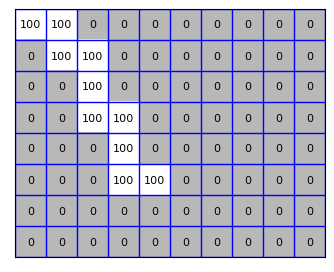

input sec5_1
<scaled size: (8 x 10) >


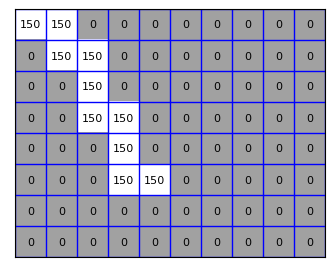

output sec5_1
<scaled size: (8 x 10) >


In [21]:
vd.dispsvx ('sec5_1.vx', capt='input sec5_1')
vd.dispsvx ('sec5_1.mx', capt='output sec5_1')

The input image has nine connected blocks of pixels 100. The output image recognized these nine blocks of pixels and labeled them as 150, which fits the algorithm well.

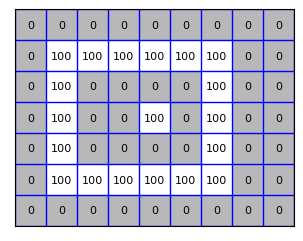

input sec5_2
<scaled size: (7 x 9) >


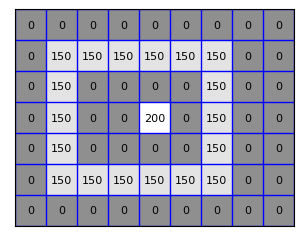

output sec5_2
<scaled size: (7 x 9) >


In [22]:
vd.dispsvx ('sec5_2.vx', capt='input sec5_2')
vd.dispsvx ('sec5_2.mx', capt='output sec5_2')

The algorithm identified two separate pixel regions in the input image and assigned labels to them in order from top to bottom: 150 and 200.

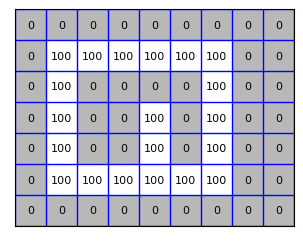

input sec5_3
<scaled size: (7 x 9) >


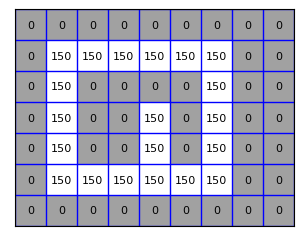

output sec5_3
<scaled size: (7 x 9) >


In [23]:
vd.dispsvx ('sec5_3.vx', capt='input sec5_3')
vd.dispsvx ('sec5_3.mx', capt='output sec5_3')

Unlike the previous test, the algorithm found the blocks of pixels in the input image as a whole, so only one label was assigned: 150.

#### 5.3 Large Imge tests

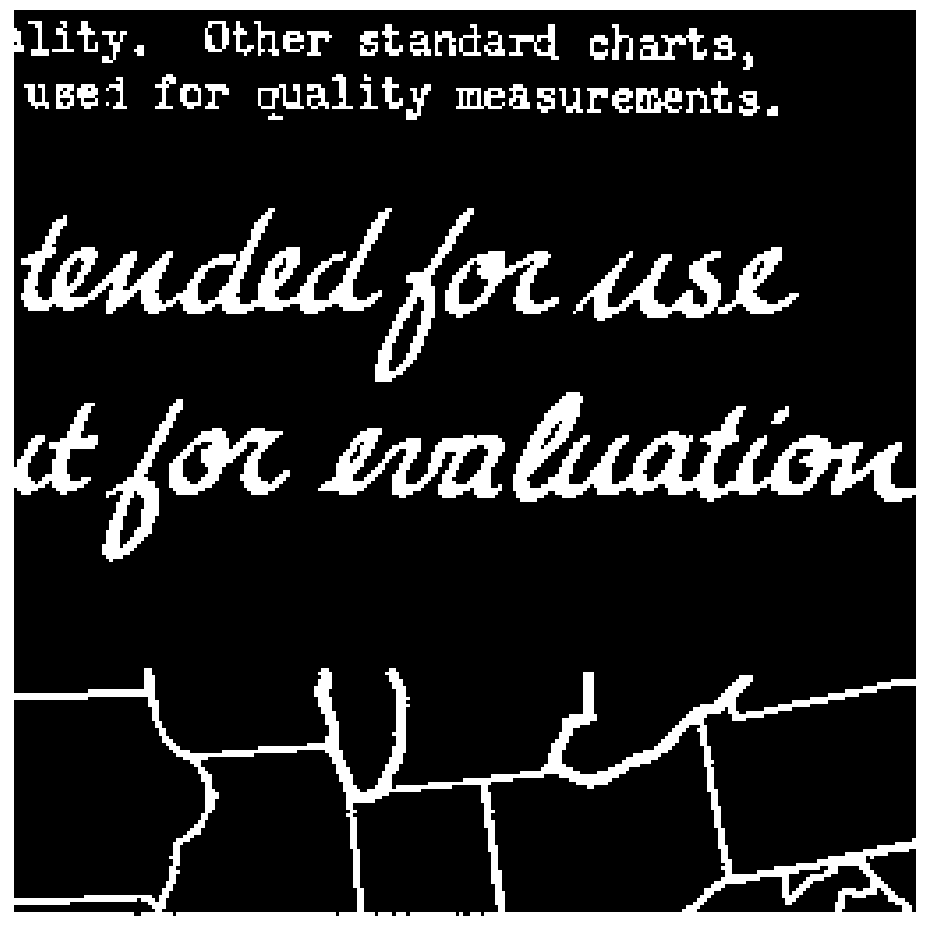

input im3
<scaled size: (256 x 256) >


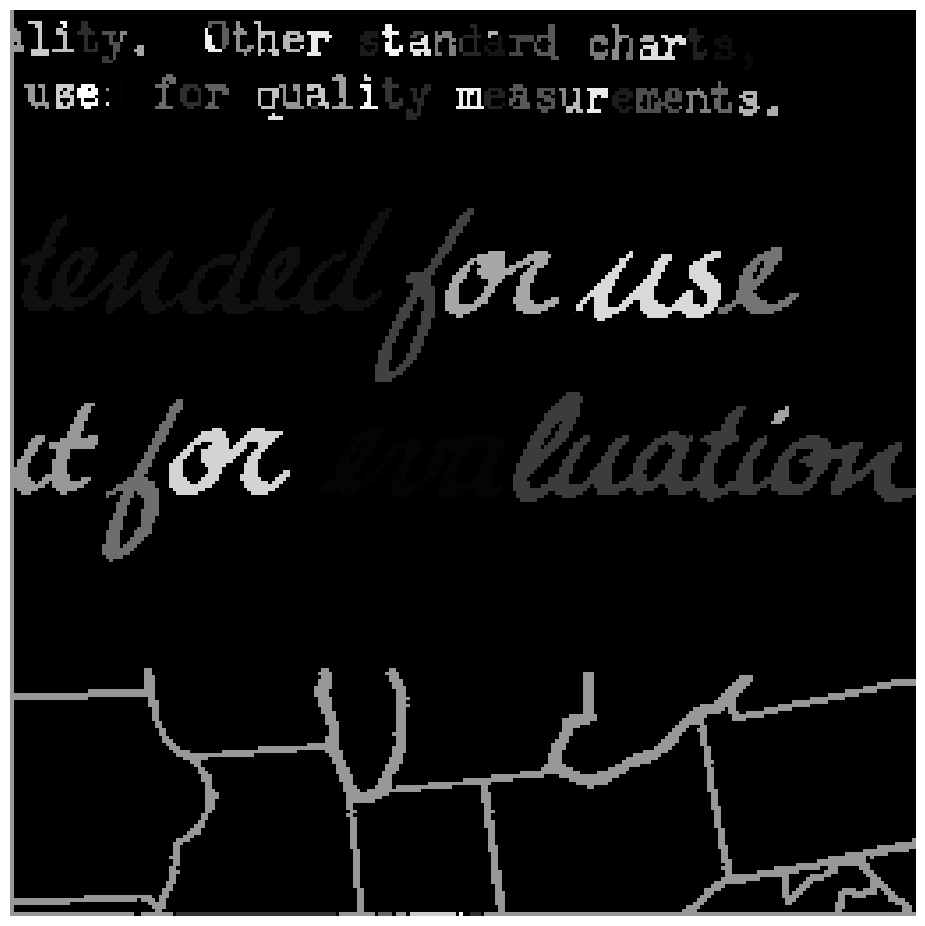

output im3
<scaled size: (256 x 256) >


In [27]:
vd.dispmvx ('im3.vx',size=3,capt='input im3')
vd.dispmvx ('im3.mx',size=3, capt='output im3')

The algorithm detected the connected components successfully in the full size
 image and reassigns values(labels) to the pixels. 

At the top of the input image are some individual letters. Through the program, these letters appeared in different degrees of gray. This means that they were given different pixel values.

In the middle section, each concatenated word was independently identified and given a new pixel value(label).

At the picture step, a whole connected local map was given the same pixel value(label).

